In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats #thư viện liên quan đến tính toán khoa học
import statsmodels.api as sm #mô-đun Python cung cấp các lớp và chức năng để ước tính nhiều mô hình thống kê khác nhau

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv(r"/content/Cars Data.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [5]:
data.shape # số hàng và số cột xuất hiện trong data

(432, 15)

In [6]:
df.isnull().sum() # kiểm tra các ô dữ liệu null

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [7]:
# Data Cleaning (làm sạch dữ liệu)
df = df.fillna(np.mean(df))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [8]:
df.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [11]:
df.shape # số hàng và số cột sau khi lọc dữ liệu

(428, 15)

In [12]:
Make = df["Make"].value_counts() # cho biết các hạng tham gia thị trường ôtô và số lượng model

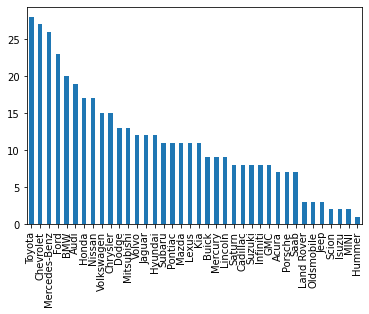

In [13]:
Make.plot.bar() # biểu đồ thể hiện số lượng các model các hãng đang có trên thị trường 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fef96647350>],
      dtype=object)

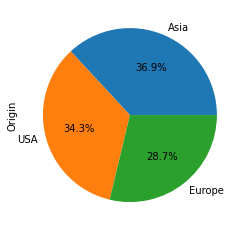

In [14]:
df['Origin'].value_counts().plot(kind='pie', subplots=True,
         autopct='%1.1f%%') # Tỉ Trọng các mẫu xe đến từ các châu lục

In [15]:
Asia_Cars = df[df['Origin'].isin(['Asia'])] # Dataframe của tất cả các model xe đến từ châu á

In [16]:
Asia_Cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [17]:
USA_Cars = df[df['Origin'].isin(['USA'])] # Dataframe của tất cả các model xe đến từ Mỹ

In [18]:
USA_Cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
48,Buick,Rainier,SUV,USA,All,"$37,895","$34,357",4.2,6.0,275.0,15.0,21.0,4600.0,113.0,193.0
49,Buick,Rendezvous CX,SUV,USA,Front,"$26,545","$24,085",3.4,6.0,185.0,19.0,26.0,4024.0,112.0,187.0
50,Buick,Century Custom 4dr,Sedan,USA,Front,"$22,180","$20,351",3.1,6.0,175.0,20.0,30.0,3353.0,109.0,195.0
51,Buick,LeSabre Custom 4dr,Sedan,USA,Front,"$26,470","$24,282",3.8,6.0,205.0,20.0,29.0,3567.0,112.0,200.0
52,Buick,Regal LS 4dr,Sedan,USA,Front,"$24,895","$22,835",3.8,6.0,200.0,20.0,30.0,3461.0,109.0,196.0


In [19]:
Europe_Cars = df[df['Origin'].isin(['Europe'])] # Dataframe của tất cả các model xe đến từ Châu Âu

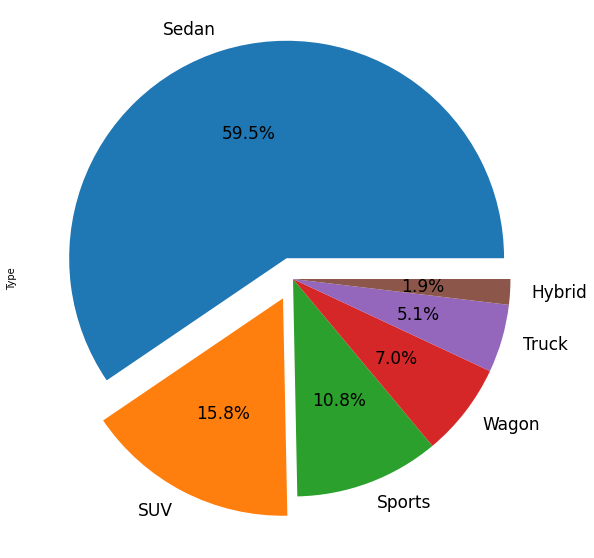

In [20]:
#Tỉ Trọng Các Loại Xe từ Châu Á --> Tại Sao Sedan lại phổ biến 
Car_types_Asia = (Asia_Cars['Type'].value_counts()).plot(kind='pie', subplots=True, autopct='%1.1f%%',explode = (0.1,0.1,0,0,0,0), fontsize =17 , figsize = (10,10), layout=(1,1))

In [21]:
#from IPython.core.pylabtools import figsize
#plt.figure()
#plt.subplot(1,3,1)
#labels=['Sedan','SUV','Sports','Wagon','Truck','Hybrid']
#plt.pie(x=Car_types_Asia.values, labels=labels, autopct='%1.1f%%',explode = (0.1,0,0,0,0,0), shadow=True, startangle=1000,)
#Car_types_Asia.plot(kind='pie', subplots=True, autopct='%1.1f%%',explode = (0.1,0,0,0,0,0), fontsize = 7)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef96104810>]],
      dtype=object)

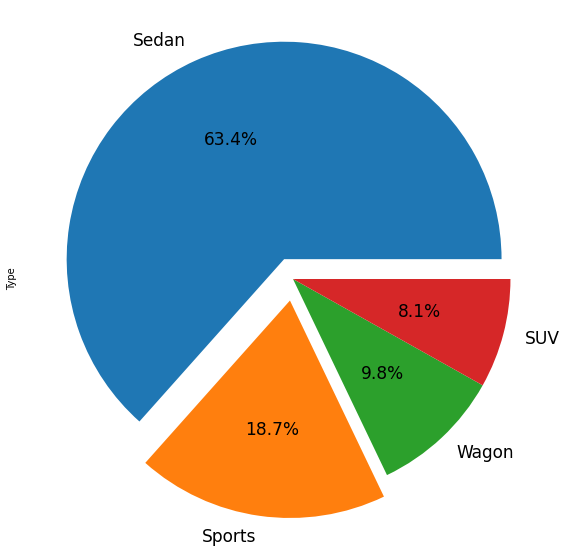

In [22]:
#Tỉ Trọng Các Loại Xe từ Châu Âu --> Tại Sao xe thể thao lại được ưa chuộng, Vì Sao lại không sản xuất xe tải
Europe_Cars.Type.unique()
Europe_Cars.Type.value_counts().plot(kind='pie', subplots=True, autopct='%1.1f%%',explode = (0.1,0.1,0,0), fontsize = 17,figsize = (10,10), layout=(1,1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef960e05d0>]],
      dtype=object)

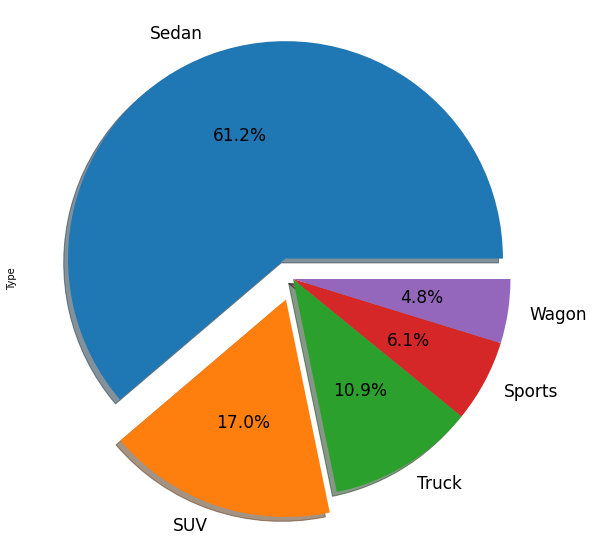

In [23]:
#Tỉ Trọng Các Loại Xe từ Mỹ --> Tại Sao SUV lại được ưa chuộng
USA_Cars.Type.unique()
USA_Cars.Type.value_counts().plot(kind='pie', subplots=True, autopct='%1.1f%%',explode = (0.1,0.1,0,0,0), fontsize = 17,figsize = (10,10), layout=(1,1),shadow=True)

In [24]:
USA_Cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
48,Buick,Rainier,SUV,USA,All,"$37,895","$34,357",4.2,6.0,275.0,15.0,21.0,4600.0,113.0,193.0
49,Buick,Rendezvous CX,SUV,USA,Front,"$26,545","$24,085",3.4,6.0,185.0,19.0,26.0,4024.0,112.0,187.0
50,Buick,Century Custom 4dr,Sedan,USA,Front,"$22,180","$20,351",3.1,6.0,175.0,20.0,30.0,3353.0,109.0,195.0
51,Buick,LeSabre Custom 4dr,Sedan,USA,Front,"$26,470","$24,282",3.8,6.0,205.0,20.0,29.0,3567.0,112.0,200.0
52,Buick,Regal LS 4dr,Sedan,USA,Front,"$24,895","$22,835",3.8,6.0,200.0,20.0,30.0,3461.0,109.0,196.0


0    Front
dtype: object


<BarContainer object of 2 artists>

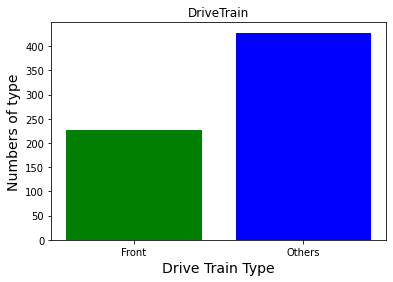

In [25]:
# Hệ Thống Truyền động nào là hệ thống được sử dụng rộng rãi nhất -> Tại Sao
most_popular_DriveTrain = df["DriveTrain"].mode()
print(most_popular_DriveTrain)
df.DriveTrain.value_counts().Front
plt.figure()
plt.title('DriveTrain')
labels = ['Front', 'Other']
DriveTrainNumber = [df.DriveTrain.value_counts().Front, 428]
DriveName = ['Front', 'Others']
New_Colors = ['green','blue']
plt.xlabel('Drive Train Type', fontsize=14)
plt.ylabel('Numbers of type', fontsize=14)
plt.bar(DriveName, DriveTrainNumber, color=New_Colors)

In [26]:
df['MSRP'] = df["MSRP"].str.replace("$","")
df['MSRP'] = df['MSRP'].str.replace(" ","")
df['MSRP'] = df['MSRP'].str.replace(",",".")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


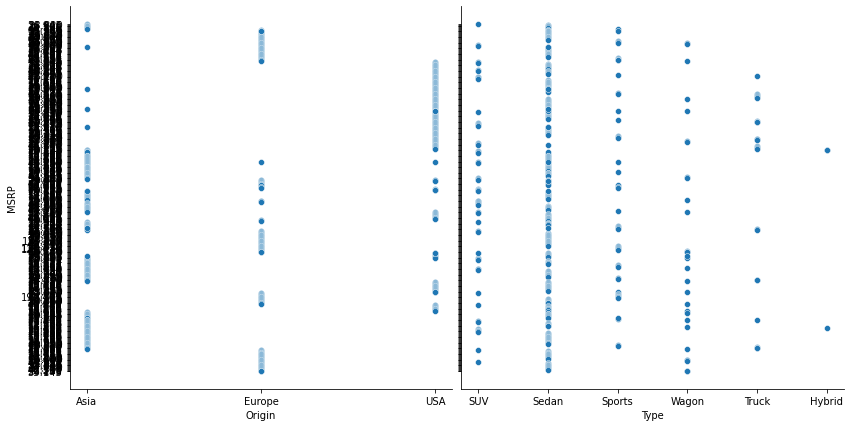

In [27]:
Asia_Car_Price = df.loc[df['Origin'] == "Asia", 'MSRP'].tolist() # phổ giá trị của tất cả các mẫu xe đến từ Châu Á
Europe_Car_Price = df.loc[df['Origin'] == "Europe", 'MSRP'].tolist() # phổ giá trị của tất cả các mẫu xe đến từ Châu Âu
USA_Car_Price = df.loc[df['Origin'] == "USA", 'MSRP'].tolist() # phổ giá trị của tất cả các mẫu xe đến từ Mỹ
def pp(x,y):
    sb.pairplot(df, x_vars=[x,y], y_vars='MSRP',size=6, aspect=1, kind='scatter') # aspect:tỉ lệ cột
    plt.show()
pp("Origin", "Type")

In [28]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36.945,"$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23.820,"$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26.990,"$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33.195,"$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43.755,"$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [29]:
df.head

<bound method NDFrame.head of       Make                    Model   Type  Origin DriveTrain    MSRP  \
0    Acura                      MDX    SUV    Asia        All  36.945   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23.820   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26.990   
3    Acura                   TL 4dr  Sedan    Asia      Front  33.195   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43.755   
..     ...                      ...    ...     ...        ...     ...   
427  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40.565   
428  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42.565   
429  Volvo               S80 T6 4dr  Sedan  Europe      Front  45.210   
430  Volvo                      V40  Wagon  Europe      Front  26.135   
431  Volvo                     XC70  Wagon  Europe        All  35.145   

      Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0    $33,337      

In [30]:
df['Make'] = df["Make"].map({'Acura':0, 'Audi':1, 'BMW':2, 'Buick':3, 'Cadillac':4,'Chevrolet':5, 'Chrysler':6, 'Dodge':7, 'Ford':8, 'GMC':9, 'Honda':10,
                             'Hummer':11, 'Hyundai':12,'Infiniti':13, 'Isuzu':14, 'Jaguar':15
                             , 'Jeep':16, 'Kia':17, 'Land Rover':18,'Lexus':19, 'Lincoln':20, 'MINI':21, 'Mazda':22, 'Mercedes-Benz':23, 'Mercury':24,
                             'Mitsubishi':25, 'Nissan':26, 'Oldsmobile':27, 'Pontiac':28, 'Porsche':29, 'Saab':30,
                             'Saturn':31, 'Scion':32, 'Subaru':33, 'Suzuki':34, 'Toyota':35, 'Volkswagen':36,'Volvo':37})

In [31]:
df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [32]:
df["Type"]=df["Type"].map({'SUV':0, 'Sedan':1, 'Sports':2, 'Wagon':3, 'Truck':4, 'Hybrid':5})

In [33]:
df.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [34]:
df["Origin"]=df["Origin"].map({'Asia':0, 'Europe':1, 'USA':2})

In [35]:
df.DriveTrain.unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [36]:
df['DriveTrain']=df['DriveTrain'].map({'All':0, 'Front':1, 'Rear':2})

In [37]:
Y = df["MSRP"].str.replace("$","")
Y = Y.str.replace(" ","")
Y = Y.str.replace(",",".")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [38]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,MDX,0,0,0,36.945,"$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,0,RSX Type S 2dr,1,0,1,23.820,"$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,0,TSX 4dr,1,0,1,26.990,"$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,0,TL 4dr,1,0,1,33.195,"$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,0,3.5 RL 4dr,1,0,1,43.755,"$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [39]:
X = df[['Make','Type','Origin','DriveTrain','EngineSize', 'Cylinders', 'Horsepower']]

In [40]:
Y.head()

0    36.945
1    23.820
2    26.990
3    33.195
4    43.755
Name: MSRP, dtype: object

In [41]:
X1 = sm.add_constant(X)
X1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Make,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower
0,1.0,0,0,0,0,3.5,6.0,265.0
1,1.0,0,1,0,1,2.0,4.0,200.0
2,1.0,0,1,0,1,2.4,4.0,200.0
3,1.0,0,1,0,1,3.2,6.0,270.0
4,1.0,0,1,0,1,3.5,6.0,225.0


In [42]:
he_so_du_doan = sm.OLS(Y.astype(float),X1.astype(float)).fit()

In [43]:
print(he_so_du_doan.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     147.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.50e-109
Time:                        14:00:45   Log-Likelihood:                -1610.9
No. Observations:                 428   AIC:                             3238.
Df Residuals:                     420   BIC:                             3270.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6264      2.583     -7.600      0.0

In [44]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,MDX,0,0,0,36.945,"$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,0,RSX Type S 2dr,1,0,1,23.820,"$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,0,TSX 4dr,1,0,1,26.990,"$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,0,TL 4dr,1,0,1,33.195,"$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,0,3.5 RL 4dr,1,0,1,43.755,"$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [45]:
Make = 0
Type = 0
Origin = 0
DriveTrain = 0
EngineSize = 3.5
Cylinders	= 6.0
Horsepower = 265.0
price_prediction = (-19.6264 + Make*0.0646 + Type*-0.1971 + Origin*0.8981 + DriveTrain*1.0503 + EngineSize*-6.2208 + Cylinders*2.5482  + Horsepower*0.2531)
                    
price_prediction


40.9615